In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
%matplotlib inline

Using TensorFlow backend.


In [2]:
# keras 整理好的 imdb 資料
from keras.datasets import imdb

In [3]:
# num_words 找前 10000 個最常用的字
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [4]:
# 訓練資料的長度
len(x_train)

25000

In [5]:
# 測試資料的長度
len(x_test)

25000

In [6]:
x_train.shape

(25000,)

In [7]:
# 看看第 87 筆資料長怎樣，Keras 的 imdb 的資料已經將字轉成數字
# 轉法就是把所有資料裡面出現最多的字，依序排列下來，然後依序（由多到少）建成字典
x_train[87]

[1,
 61,
 795,
 203,
 30,
 6,
 227,
 7,
 6,
 1361,
 18,
 51,
 45,
 290,
 570,
 150,
 48,
 25,
 459,
 195,
 10,
 10,
 1907,
 1698,
 144,
 28,
 77,
 3670,
 6,
 2300,
 1523,
 1338,
 18,
 154,
 698,
 372,
 8,
 79,
 312,
 23,
 268,
 14,
 22,
 9,
 995,
 4,
 8171,
 228,
 9,
 35,
 8236,
 17,
 26,
 4,
 578,
 5323,
 3729,
 15,
 2,
 1719,
 56,
 8,
 931,
 23,
 4,
 1321,
 1103,
 11,
 4,
 1749,
 18,
 463,
 449,
 13,
 79,
 12,
 14,
 9,
 691,
 6,
 8338,
 5,
 7524,
 20,
 93,
 3084,
 34,
 94,
 2,
 631,
 956,
 5,
 4905,
 2,
 3981,
 671,
 8,
 2,
 1426,
 23,
 35,
 311,
 772,
 41,
 544,
 584,
 13,
 100,
 1227,
 842,
 4,
 1588,
 120,
 33,
 312,
 211,
 3413,
 5611,
 68,
 2,
 120,
 4,
 4197,
 2,
 15,
 2,
 14,
 431,
 249,
 136,
 776,
 4905,
 1027,
 8,
 2,
 41,
 2,
 2,
 23,
 4,
 890,
 7,
 1316,
 11,
 6,
 2,
 428,
 2727,
 1735,
 24,
 163,
 24,
 204,
 24,
 221,
 24,
 6,
 52,
 20,
 4,
 693,
 241,
 675,
 9,
 4,
 959,
 7,
 2,
 120,
 9719,
 92,
 437,
 129,
 58]

In [8]:
# 每筆資料長度的是不一樣的，但是 Keras 碰到長度不足的會自動補 0
[len(x_train[i]) for i in range(10)]

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130]

In [9]:
# 利用 keras 把資料處理成同樣長度
from keras.preprocessing import sequence
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [10]:
# 觀察處理過後的長度
[len(x_train[i]) for i in range(10)]

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100]

In [11]:
# 原本少於 100 字的資料就會補 0 進去，補前面因為後面補 0 的時候要額外判斷與句結尾，
x_train[5]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    1,  778,  128,   74,   12,  630,  163,   15,    4,
       1766, 7982, 1051,    2,   32,   85,  156,   45,   40,  148,  139,
        121,  664,  665,   10,   10, 1361,  173,    4,  749,    2,   16,
       3804,    8,    4,  226,   65,   12,   43,  127,   24,    2,   10,
         10], dtype=int32)

## 打造RNN

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

In [13]:
model = Sequential()

In [14]:
model.add(Embedding(10000, 128))

In [15]:
model.add(LSTM(150))

In [16]:
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 150)               167400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 1,447,551
Trainable params: 1,447,551
Non-trainable params: 0
_________________________________________________________________


In [19]:
from keras.utils import plot_model
#from keras.utils.vis_utils import plot_model

In [20]:
plot_model(model, show_shapes=True, to_file='RNN.png')

![RNN](RNN.png)

In [21]:
model.fit(x_train, y_train,
         batch_size = 32,
         epochs = 2)

Epoch 1/2
25000/25000 [==============================] - 195s - loss: 0.4288 - acc: 0.7980   
Epoch 2/2
25000/25000 [==============================] - 192s - loss: 0.2647 - acc: 0.8928   


In [25]:
model.save('rnn.h5')

In [22]:
model.load_weights('rnn.h5')

In [23]:
score = model.evaluate(x_test, y_test)

24992/25000 [============================>.] - ETA: 0s

In [25]:
print("loss:",score[0])
print("acc:",score[1])

loss: 0.343483824902
acc: 0.8516


## SELU

In [26]:
x = np.linspace(-5, 10, 200)

In [56]:
def selu(x):
    y = []
    lamba = 1.050700987
    alpha = 1.673263242
    if type(x) != int:
        for i in range(len(x)):
            if x[i] <= 0:
                y.append(lamba * (alpha * np.exp(x[i]) - alpha))
            else:
                y.append(lamba * x[i])
    else:
        if x <= 0:
            y.append(lamba * (alpha * np.exp(x) - alpha))
        else:
            y.append(lamba * x)
    return y

In [54]:
y = selu(x)

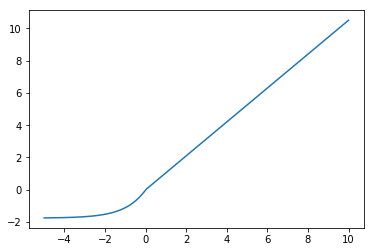

In [41]:
plt.plot(x, y)